In [72]:
from scipy import stats
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import sklearn.mixture
# import mixem
from sklearn.decomposition import FastICA
import seaborn as sns
sns.set(color_codes=True)

plt.ioff()

# print(stats.norm.__doc__)

In [73]:
data = np.random.normal(size=1000)

In [74]:
mean_1, stdev_1 = norm.fit(data)

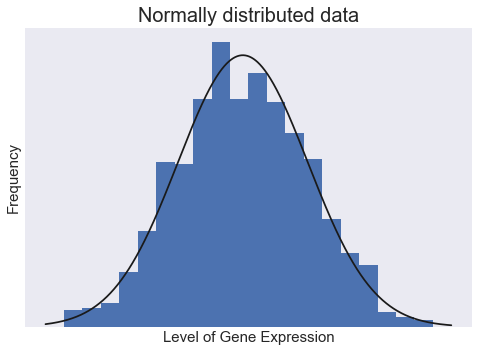

In [90]:
plt.hist(data, normed=True, bins=20)

xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 1000)
pdf = norm.pdf(x_axis, mean_1, stdev_1)

plt.plot(x_axis, pdf, 'k')
plt.xticks([])
plt.yticks([])
plt.xlabel('Level of Gene Expression', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Normally distributed data', fontsize=20)
plt.show()


In [91]:
data2 = np.random.normal(loc=6, scale=3, size=1000)
data3 = np.concatenate((data2, data))

In [92]:
mean, std = norm.fit(data3)

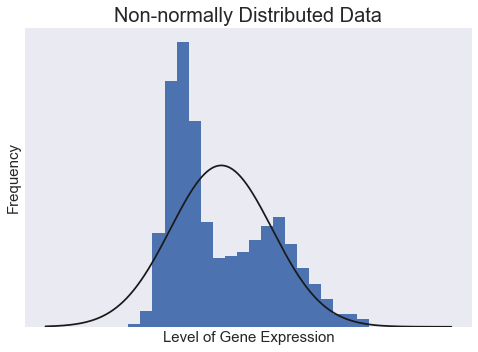

In [93]:
p = norm.pdf(data3)
x_axis = np.linspace(-5, 5, num=len(data3))
# print(p)
g = norm.pdf(x_axis, 0, 1)

mean, stdev = norm.fit(data3)


plt.hist(data3, normed=True, bins=20)

xmin, xmax = -10, 20
x_axis = np.linspace(xmin, xmax, 1000)
pdf = norm.pdf(x_axis, mean, stdev)

plt.plot(x_axis, pdf, 'k')
plt.xticks([])
plt.yticks([])
plt.xlabel('Level of Gene Expression', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Non-normally Distributed Data", fontsize=20)
plt.show()

In [94]:
gmm = sklearn.mixture.GaussianMixture(n_components=2)
gmm.fit(data2.reshape(-1, 1))
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [95]:
def gaussian(x, mean, stdev, weight):
    return weight * np.exp((-(x-mean)**2 / 2) / stdev**2)

def bimodal(x, mean_1, stdev_1, weight_1, mean_2, stdev_2, weight_2):
    return gaussian(x, mean_1, stdev_1, weight_1) + gaussian(x, mean_2, stdev_2, weight_2)

-2.80663248846
2.93442486606


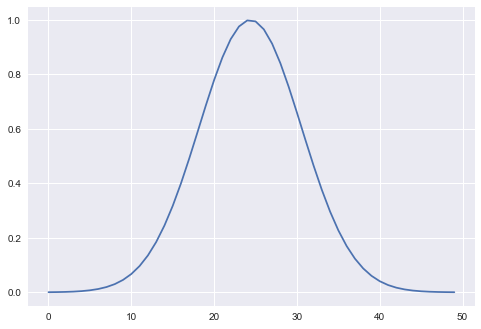

In [96]:
print(min(data))
print(max(data))
gaussian = gaussian(np.linspace(-4, 4), mean_1, stdev_1, 1)
gaussian
plt.plot(gaussian)
plt.show()

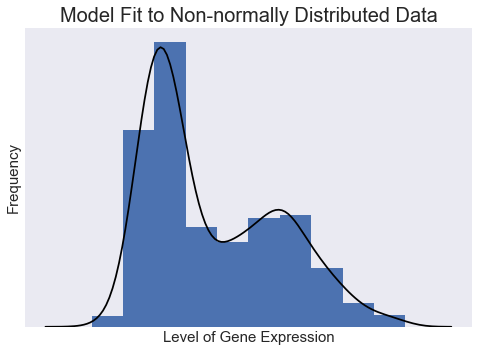

In [97]:
sns.distplot(data3, hist=False, color=("black"))
plt.hist(data3, normed=True)
plt.title("Model Fit to Non-normally Distributed Data", fontsize=20)
plt.xlabel('Level of Gene Expression', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

[ 1.23572763  7.2177166 ]


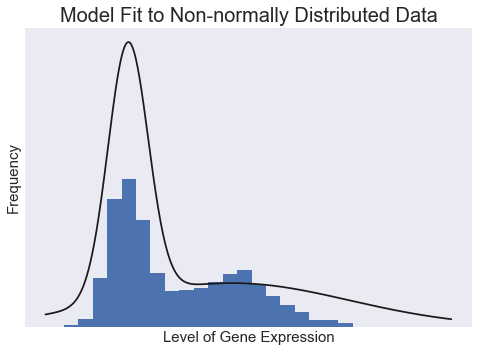

In [104]:
gmm = sklearn.mixture.GaussianMixture(n_components = 2)
gmm.fit(np.expand_dims(data3, 1))
weights = gmm.weights_
means = gmm.means_
cov = np.squeeze(gmm.covariances_)
x_axis = np.linspace(-5, 20, 1000)
print(cov)
total_pdf = 0
for i in range(len(means)):
    pdf = norm.pdf(x_axis, means[i], cov[i])

#     plt.plot(x_axis, pdf, 'k')
    total_pdf += pdf
plt.plot(x_axis, total_pdf, 'k')
plt.hist(data3, normed=True, bins=20)
plt.title("Model Fit to Non-normally Distributed Data", fontsize=20)
plt.xlabel('Level of Gene Expression', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

In [101]:
#would change get_one_p_value if distribution changed

In [102]:
def get_one_p_val(mean, cov, point):
    stdev = np.sqrt(cov)

    return scipy.stats.norm.pdf((point-mean)/stdev)

In [86]:
def p_value(means, weights, covariances, point):
    num_components = len(means)
    weighted_sum = 0
    for i in range(num_components):
        component_p_val = get_one_p_val(means[i], covariances[i], point)
        weighted_sum += weights[i]*component_p_val
    return weighted_sum

In [87]:
def get_p_value(data, point):
    
    gmm = sklearn.mixture.GaussianMixture(n_components=3)
    gmm.fit(data)
#     color_plot(gmm)
    
    means = np.squeeze(gmm.means_)
    weights = np.squeeze(gmm.weights_)
    covariances = np.squeeze(gmm.covariances_)
    
    p_val = p_value(means, weights, covariances, point)
    return p_val
get_p_value(np.expand_dims(data3, 1), 20)

7.8565279617640185e-09